## Discretização da equação de onda 2D

A equação de onda bidimensional é dada por:

$$
\frac{\partial^2 f(x,y,t)}{\partial t^2} = v^2 \left( \frac{\partial^2 f(x,y,t)}{\partial x^2} + \frac{\partial^2 f(x,y,t)}{\partial y^2} \right)
$$

Discretizando em uma malha espacial com passo $ \Delta x = \Delta y = h $ e passo temporal $ \Delta t $, e denotando $ f_{i,j}^n \approx f(x_i, y_j, t_n) $, temos:

### Derivadas espaciais:

$$
\frac{\partial^2 f}{\partial x^2} \approx \frac{f_{i+1,j}^n - 2f_{i,j}^n + f_{i-1,j}^n}{h^2}
$$

$$
\frac{\partial^2 f}{\partial y^2} \approx \frac{f_{i,j+1}^n - 2f_{i,j}^n + f_{i,j-1}^n}{h^2}
$$

### Derivada temporal de segunda ordem:

$$
\frac{\partial^2 f}{\partial t^2} \approx \frac{f_{i,j}^{n+1} - 2f_{i,j}^n + f_{i,j}^{n-1}}{(\Delta t)^2}
$$

### Substituindo na equação original:

$$
\frac{f_{i,j}^{n+1} - 2f_{i,j}^n + f_{i,j}^{n-1}}{(\Delta t)^2}
= v^2 \left(
\frac{f_{i+1,j}^n - 2f_{i,j}^n + f_{i-1,j}^n}{h^2}
+ \frac{f_{i,j+1}^n - 2f_{i,j}^n + f_{i,j-1}^n}{h^2}
\right)
$$

Multiplicando ambos os lados por $$ (\Delta t)^2 $$ e definindo $$ c = \frac{v \Delta t}{h} $$, obtemos a **regra local** para atualização de cada célula:

$$
f_{i,j}^{n+1} = 2f_{i,j}^n - f_{i,j}^{n-1}
+ c^2 \left(
f_{i+1,j}^n + f_{i-1,j}^n + f_{i,j+1}^n + f_{i,j-1}^n - 4f_{i,j}^n
\right)
$$


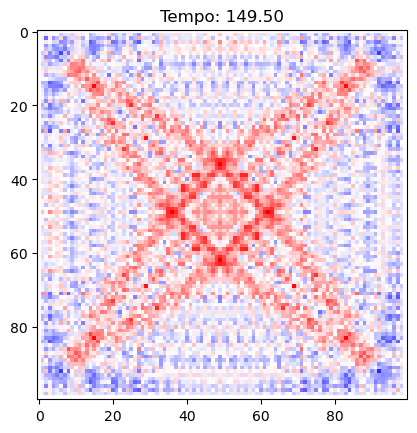

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Parâmetros
N = 100          # Tamanho da grade NxN
steps = 300      # Número de passos de tempo
v = 1.0          # Velocidade da onda
dx = dy = 1.0    # Passo espacial
dt = 0.5         # Passo temporal
c = v * dt / dx  # Fator de estabilidade

# Inicialização
f_past = np.zeros((N, N))
f_now = np.zeros((N, N))
f_next = np.zeros((N, N))

# Condição inicial: pulso no centro
f_now[N//2, N//2] = 10

# Armazenar evolução para animação
frames = []

# Criar figura
fig, ax = plt.subplots()
img = ax.imshow(f_now, cmap='seismic', vmin=-1, vmax=1, animated=True)
ax.set_title("Propagação da onda 2D")

# Atualização da simulação
def update(frame_number):
    global f_past, f_now, f_next
    for i in range(1, N-1):
        for j in range(1, N-1):
            laplaciano = (f_now[i+1, j] + f_now[i-1, j] + f_now[i, j+1] + f_now[i, j-1] - 4 * f_now[i, j])
            f_next[i, j] = 2*f_now[i, j] - f_past[i, j] + (c**2) * laplaciano

    f_past, f_now, f_next = f_now, f_next, f_past  # rotações
    img.set_array(f_now)
    ax.set_title(f"Tempo: {frame_number * dt:.2f}")
    return [img]

# Criar animação
ani = animation.FuncAnimation(fig, update, frames=steps, blit=True, interval=30)
HTML(ani.to_html5_video())
